# An AI controller for a Plug-In Hybrid Vehicle

## AI controller uses a developed python vehicle simulation platform AwesomeVehicle that takes the inputs from the AI controller and runs the vehicle

### The AI controller was trained by Genitic Algorithm(GA) and over a number of NEDCs

The AI replaces the Transmission Control Unit in the vehicle simulation platforms with a optimised power management strategy. The AI controls the Gear shifting in a PHEV and also commands the vehicle to use the right modes for complete NEDC. The AI also predicts the power distribution ratios in hybrid mode and power mode, that decides the load on engine and motor while both the power sources are being used for various purposes. The thesis was done at CEVT AB and no data rights are violated of the company, and important data is not dispalyed on any of the codes here. Have curiosity? Write to me -- anup.padaki@gmail.com

In [1]:
%load_ext autoreload
%autoreload 2
from scipy import io
from scipy.interpolate import interpolate
import numpy as np
import matplotlib.pyplot as plt
from AwesomeVehicle import PHEV
#from AwesomeICE import ICE

#from AwesomeVehicle_Copy1 import PHEV
import Utilities_PHEV as UT
#from PHEV_Anup import PHEV
#import Utilities_Anup as UT
import keras.backend as K 
import keras
from keras.callbacks import TensorBoard
from keras.models import load_model
from GA import GA
import datetime
d = io.loadmat('dan2.mat')
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


The NN was developed in Python-NumPy, any readily available high level programming packages were avoided due to the complexity in mutilthreding on CPUs. The GA is a stochastic optimiser, hence multi-threading or parallel programming helps in achieving the best result. This also helps in training faster. Neither GPUs nor cloud platforms were not used to train.

In [2]:
model,modelPython = UT.Create_Model(6,[8,6,5],5) # Bigger Model

y = model.get_weights()
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [3]:
velFile = r'D:\Master Thesis\project tech files\07August1_final_code\NEDC_mps_SingleCycle.dat'
d = np.loadtxt(velFile)[:,:1]

The below code calls for the vehicle for simulation and the simulation is run without the AI controller. The Distance and the fial SOC is printed after the completion.

In [4]:
vhc = PHEV(velFile,modelPython,{'SOC_init':15,'SOC_min':12})
vhc.RunSimulation()

completed simulation 11013.228000000074 16.353286777245863


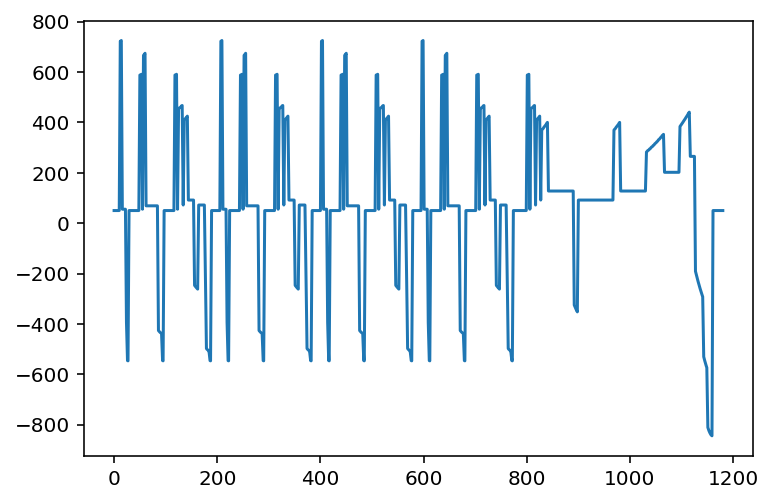

In [8]:
plt.plot(vhc.demTrq)

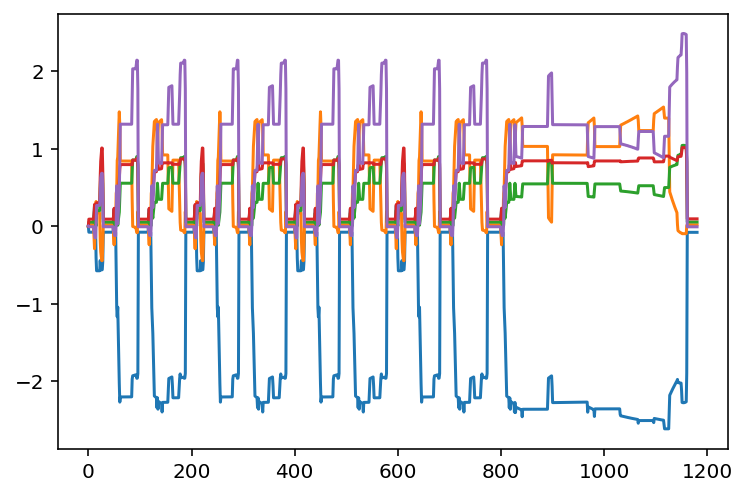

In [6]:
for ii in range(vhc.outputNN.shape[-1]):
    plt.plot(vhc.outputNN[:,ii])

In [7]:
#plt.plot(vhc.fuelFlow)

## Initialising the Training process with GA

The Genitic Algorithm(GA) was used for training as the loss function was developed by us. The attributes like convexity, smooth or others of the loss function were not familiar. Hence GA was used rather than Gradient Based optimisation.

The training is initialise here, and the vehicle attributes are passed as dictionary that overwrites the default values in vehicle class. 

In [5]:
vehicleForGA = PHEV(velFile,modelPython,{'mass':1930,'SOC_init':15,'SOC_target':15,'SOC_min':12})#'SOC_init':50,'SOC_target':95,'SOC_min':10
NNO = []
maxGenerations = 700
configGA = {'maxGenerations':maxGenerations,'nGenesVar':20,'tournamentSelectionParameter':0.7,
           'populationSize':100,'tournamentSize':2, 'nEliteCopies':1,
            'crossoverProbability':0.8,'mutationMultiplier':1,'restartOptimization':False,
            'nJobs':8
           }
ga = GA(configGA)

w = np.array(UT.GetWeightsArray(vehicleForGA.ControllerNN.get_weights()))
varRange = [(-1,1)]*w.size

The optimisation objective fuction is the Neural Network. The NN will have the optimised weights after training or say optimisation.

In [6]:
vehicleForGA = PHEV(velFile,modelPython,{'mass':1930,'SOC_init':15,'SOC_target':15,'SOC_min':12})#'SOC_init':50,'SOC_target':95,'SOC_min':10
fToOptimize = UT.VehicleToOptimizeForGA(vehicleForGA)

### Training the Feed Forward NN with GA

Restarting
Generation 0 | OF mean 7.753e+02 | Best OF 1.484e+01


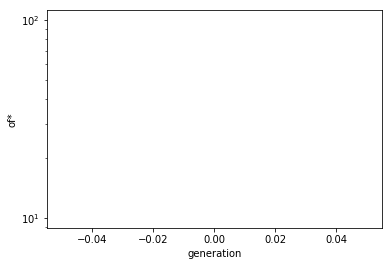

Generation 10 | OF mean 7.453e+02 | Best OF 9.705e+00


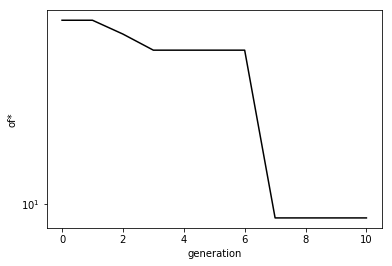

Generation 20 | OF mean 6.963e+02 | Best OF 8.717e+00


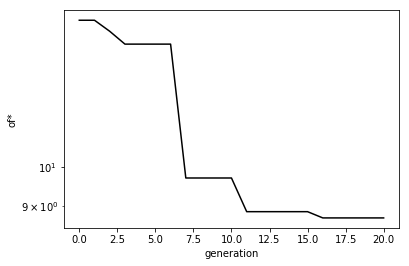

Generation 30 | OF mean 6.868e+02 | Best OF 7.677e+00


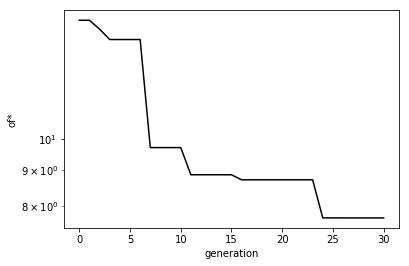

Generation 40 | OF mean 5.395e+02 | Best OF 7.658e+00


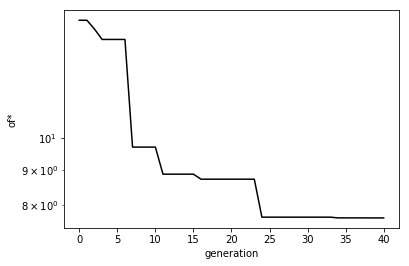

Generation 50 | OF mean 6.081e+02 | Best OF 7.652e+00


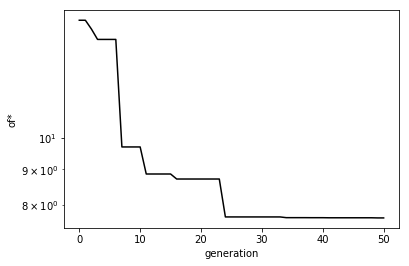

Generation 60 | OF mean 5.684e+02 | Best OF 7.155e+00


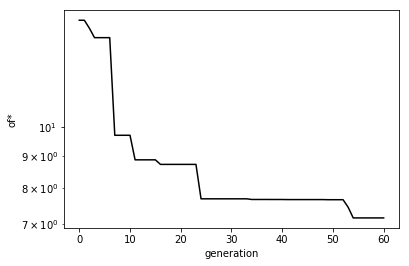

Generation 70 | OF mean 5.771e+02 | Best OF 6.787e+00


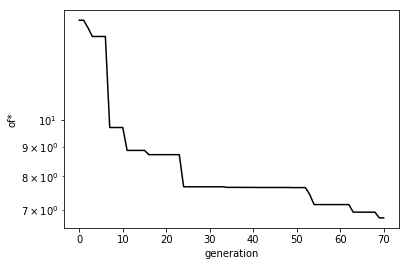

Generation 80 | OF mean 5.770e+02 | Best OF 6.786e+00


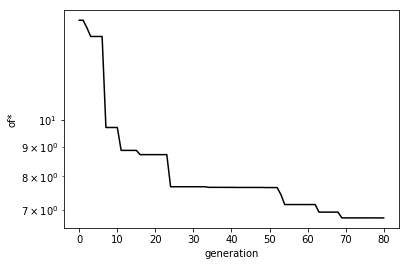

Generation 90 | OF mean 5.191e+02 | Best OF 6.786e+00


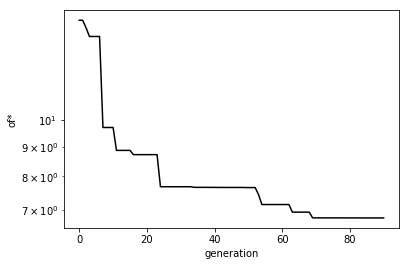

Generation 100 | OF mean 5.471e+02 | Best OF 6.603e+00


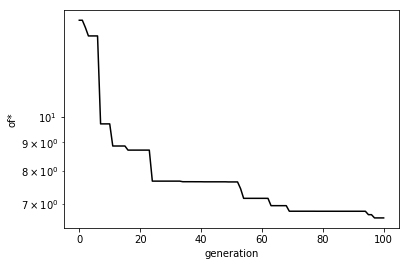

Generation 110 | OF mean 5.073e+02 | Best OF 6.439e+00


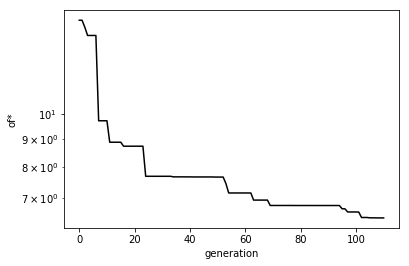

Generation 120 | OF mean 4.991e+02 | Best OF 6.274e+00


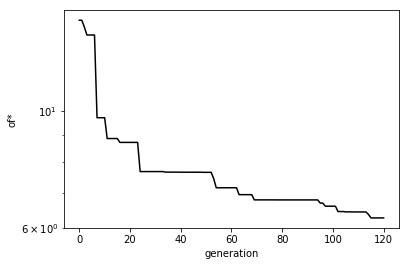

Generation 130 | OF mean 4.783e+02 | Best OF 6.265e+00


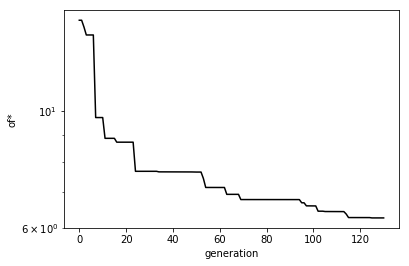

Generation 140 | OF mean 5.374e+02 | Best OF 6.264e+00


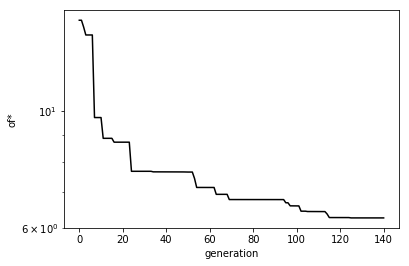

Generation 150 | OF mean 4.678e+02 | Best OF 5.946e+00


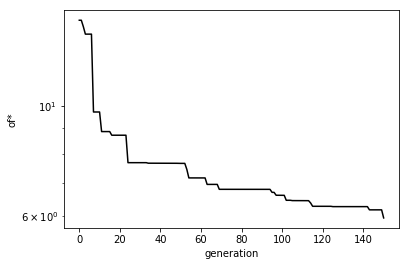

Generation 160 | OF mean 4.181e+02 | Best OF 5.830e+00


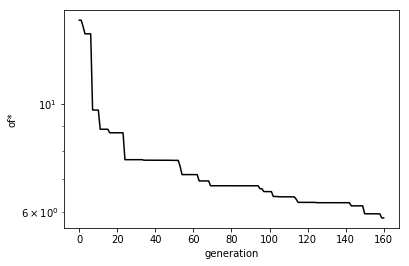

Generation 170 | OF mean 5.369e+02 | Best OF 5.824e+00


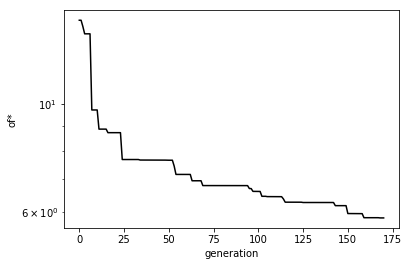

Generation 180 | OF mean 4.577e+02 | Best OF 5.792e+00


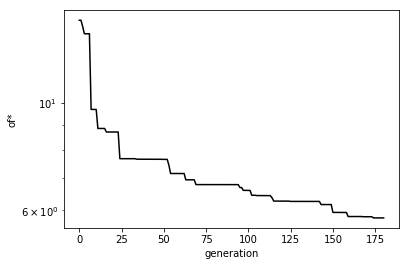

Generation 190 | OF mean 5.652e+02 | Best OF 5.767e+00


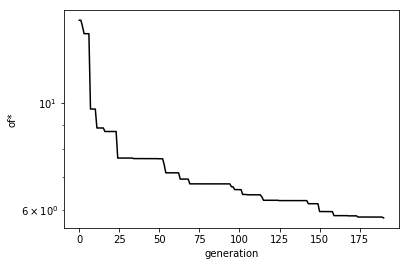

Generation 200 | OF mean 4.660e+02 | Best OF 5.749e+00


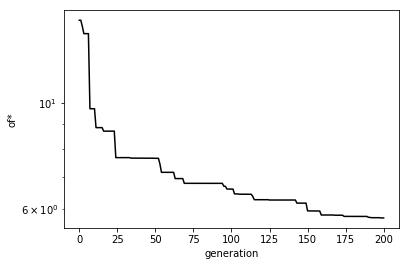

Generation 210 | OF mean 4.173e+02 | Best OF 5.696e+00


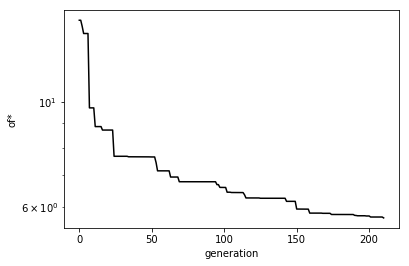

Generation 220 | OF mean 4.565e+02 | Best OF 5.696e+00


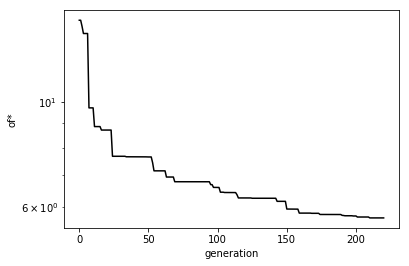

Generation 230 | OF mean 4.764e+02 | Best OF 5.595e+00


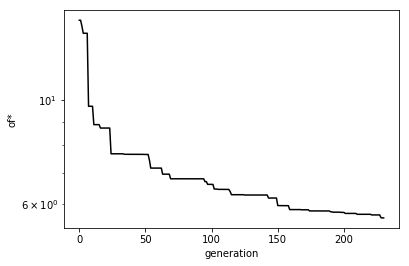

Generation 240 | OF mean 4.364e+02 | Best OF 5.508e+00


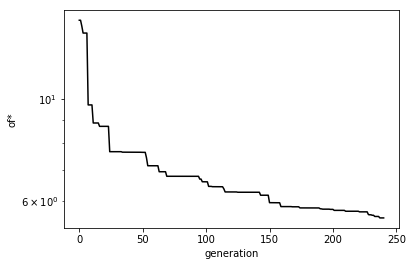

Generation 250 | OF mean 5.156e+02 | Best OF 5.444e+00


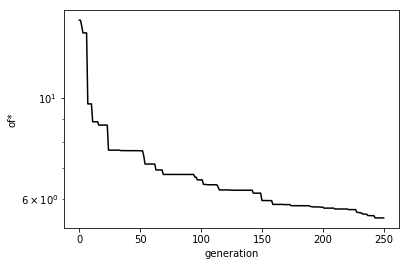

Generation 260 | OF mean 4.560e+02 | Best OF 5.442e+00


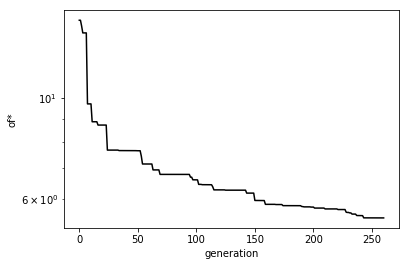

Generation 270 | OF mean 5.557e+02 | Best OF 5.442e+00


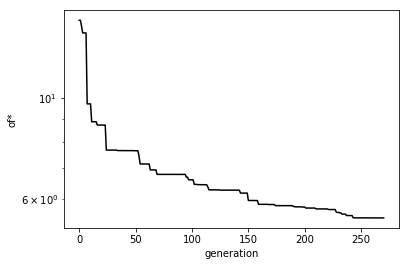

Generation 280 | OF mean 5.545e+02 | Best OF 5.440e+00


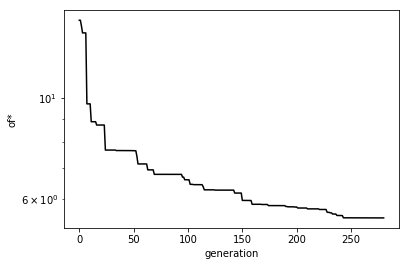

Generation 290 | OF mean 5.743e+02 | Best OF 5.438e+00


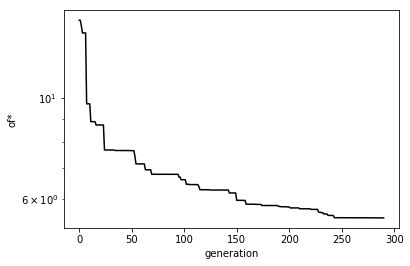

Generation 300 | OF mean 5.460e+02 | Best OF 5.426e+00


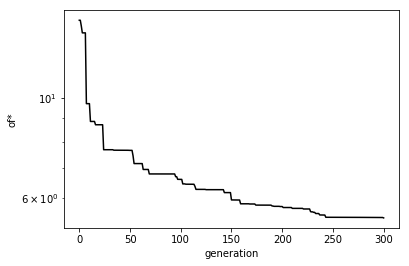

Generation 310 | OF mean 5.355e+02 | Best OF 5.425e+00


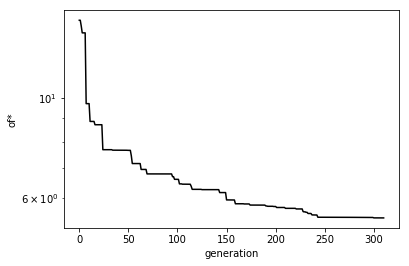

Generation 320 | OF mean 5.659e+02 | Best OF 5.425e+00


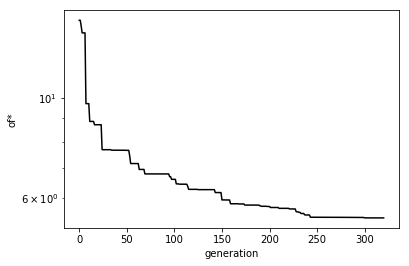

Generation 330 | OF mean 6.147e+02 | Best OF 5.425e+00


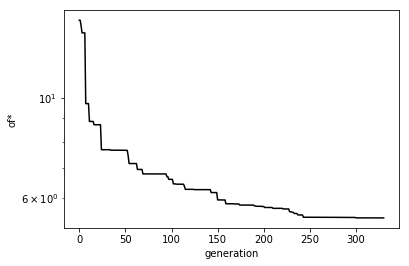

Generation 340 | OF mean 5.847e+02 | Best OF 5.425e+00


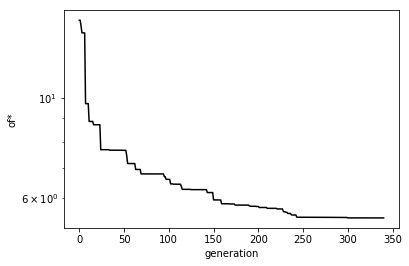

Generation 350 | OF mean 5.949e+02 | Best OF 5.421e+00


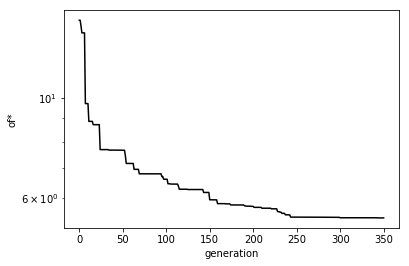

Generation 360 | OF mean 5.066e+02 | Best OF 5.420e+00


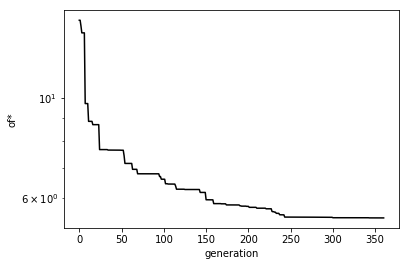

Generation 370 | OF mean 5.951e+02 | Best OF 5.420e+00


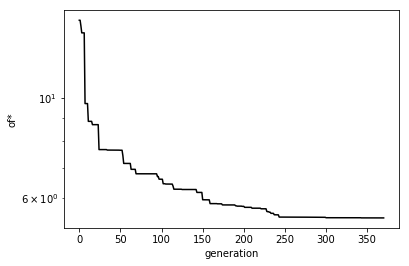

Generation 380 | OF mean 5.654e+02 | Best OF 5.420e+00


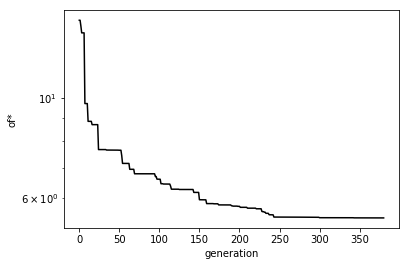

Generation 390 | OF mean 5.757e+02 | Best OF 5.420e+00


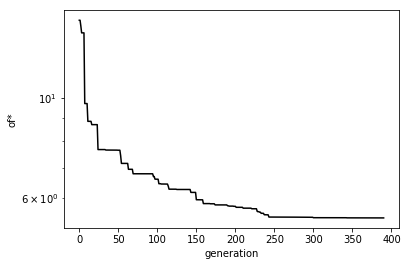

Generation 400 | OF mean 6.142e+02 | Best OF 5.419e+00


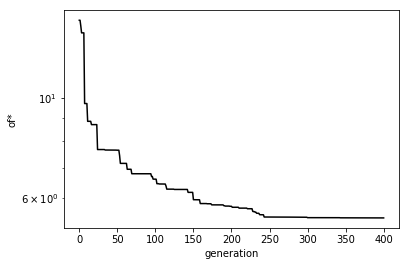

Generation 410 | OF mean 6.741e+02 | Best OF 5.419e+00


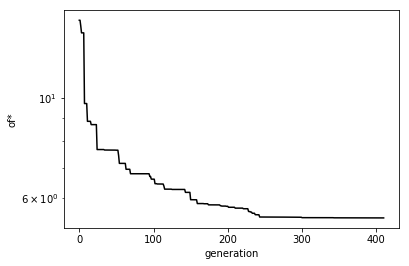

Generation 420 | OF mean 5.463e+02 | Best OF 5.419e+00


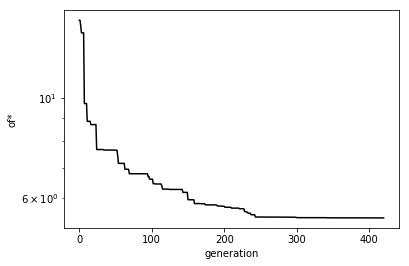

Generation 430 | OF mean 5.855e+02 | Best OF 5.412e+00


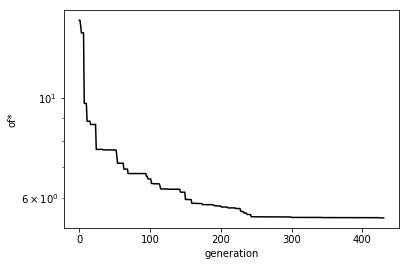

Generation 440 | OF mean 5.755e+02 | Best OF 5.412e+00


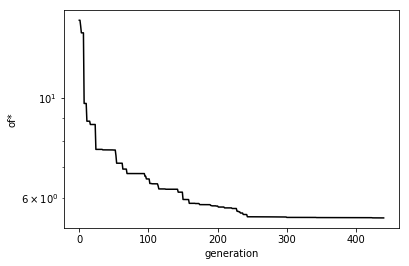

Generation 450 | OF mean 5.854e+02 | Best OF 5.411e+00


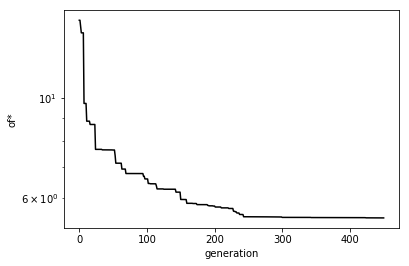

Generation 460 | OF mean 6.157e+02 | Best OF 5.411e+00


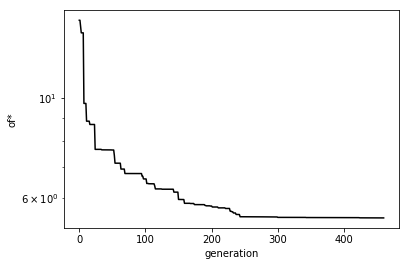

Generation 470 | OF mean 6.238e+02 | Best OF 5.411e+00


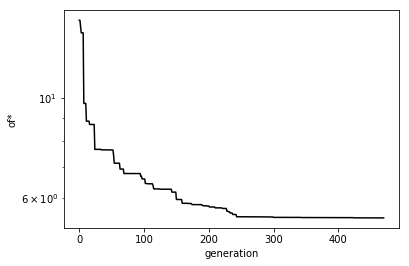

Generation 480 | OF mean 6.441e+02 | Best OF 5.411e+00


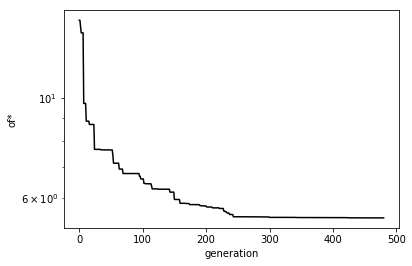

Generation 490 | OF mean 6.148e+02 | Best OF 5.411e+00


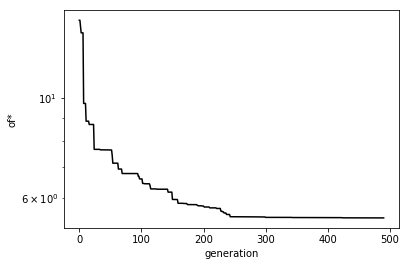

Generation 500 | OF mean 6.144e+02 | Best OF 5.375e+00


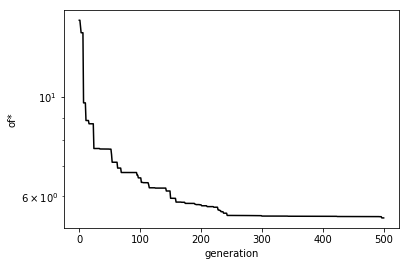

Generation 510 | OF mean 5.354e+02 | Best OF 5.374e+00


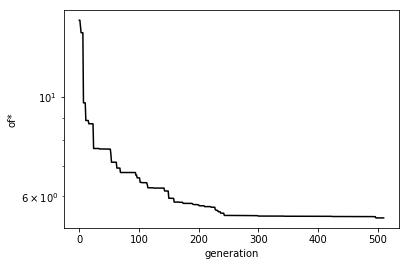

Generation 520 | OF mean 6.650e+02 | Best OF 5.374e+00


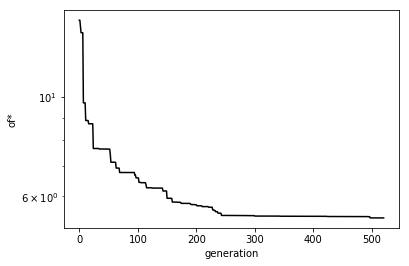

Generation 530 | OF mean 5.956e+02 | Best OF 5.374e+00


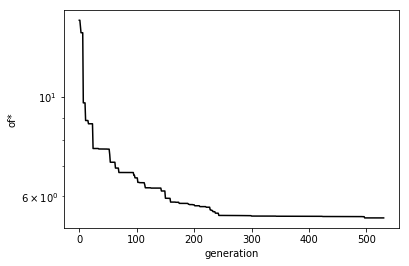

Generation 540 | OF mean 5.471e+02 | Best OF 5.372e+00


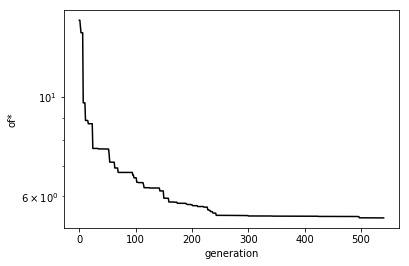

Generation 550 | OF mean 5.469e+02 | Best OF 5.370e+00


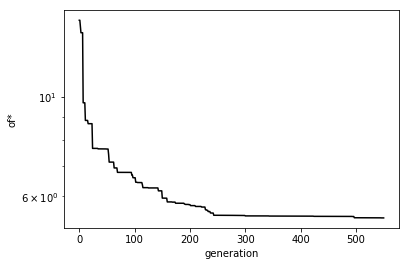

Generation 560 | OF mean 3.979e+02 | Best OF 5.366e+00


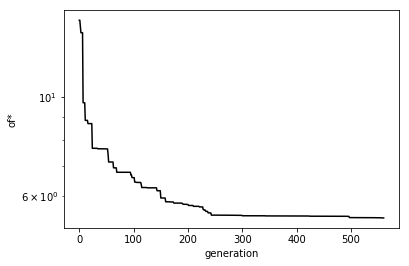

Generation 570 | OF mean 3.984e+02 | Best OF 5.366e+00


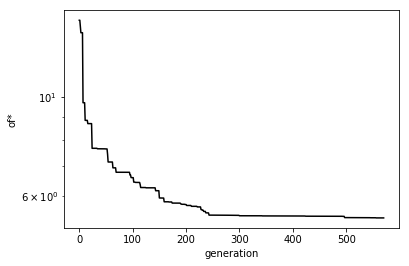

Generation 580 | OF mean 4.466e+02 | Best OF 5.366e+00


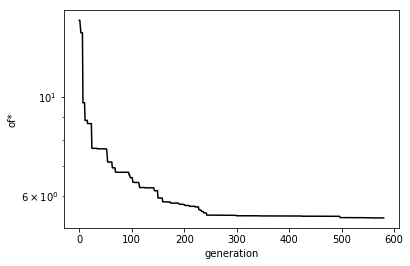

Generation 590 | OF mean 4.967e+02 | Best OF 5.351e+00


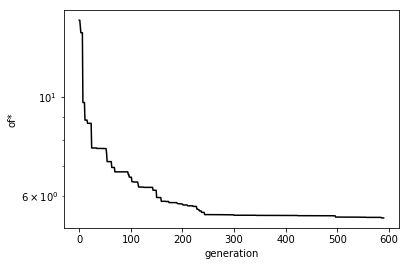

Generation 600 | OF mean 4.471e+02 | Best OF 5.339e+00


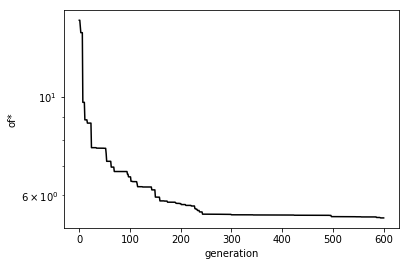

Generation 610 | OF mean 5.349e+02 | Best OF 5.338e+00


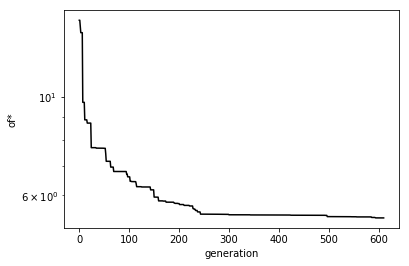

Generation 620 | OF mean 5.258e+02 | Best OF 5.338e+00


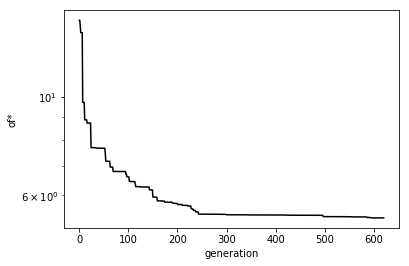

Generation 630 | OF mean 5.752e+02 | Best OF 5.338e+00


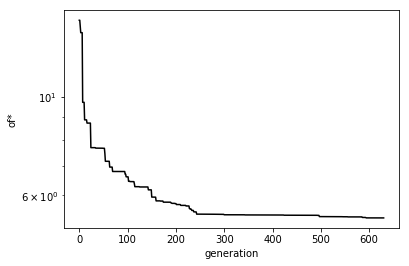

Generation 640 | OF mean 6.445e+02 | Best OF 5.338e+00


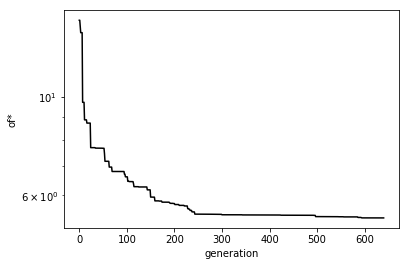

Generation 650 | OF mean 6.647e+02 | Best OF 5.338e+00


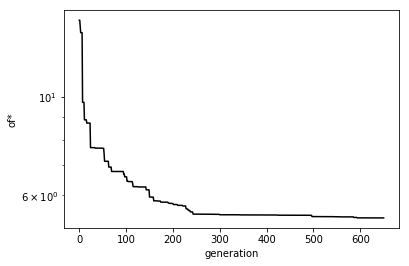

Generation 660 | OF mean 6.637e+02 | Best OF 5.338e+00


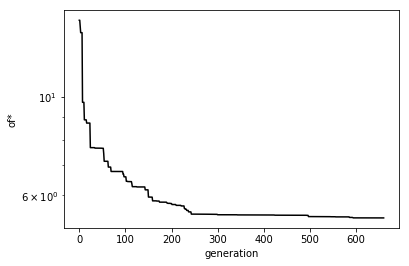

Generation 670 | OF mean 5.644e+02 | Best OF 5.338e+00


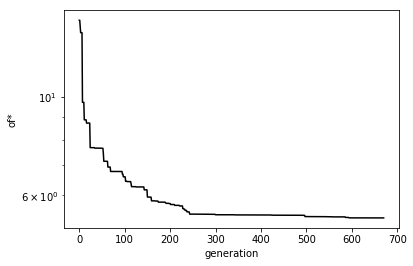

Generation 680 | OF mean 5.849e+02 | Best OF 5.338e+00


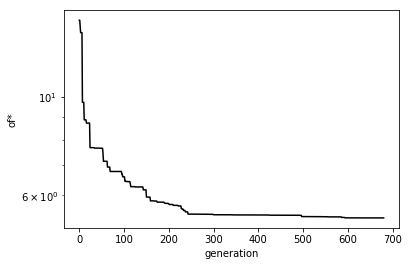

Generation 690 | OF mean 4.872e+02 | Best OF 5.338e+00


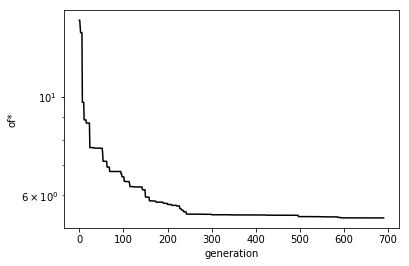

<Figure size 432x288 with 0 Axes>

In [7]:
ga.Optimize(varRange,fToOptimize,{'constraints':[],'maxmin':'min','plotResults':True})

In [ ]:
timeStr = '{0:%Y%m%d%H%M}'.format(datetime.datetime.now())
#NNO =load_model('201905171224_Model_optimised.hd5')
NNO = UT.SetWeightsIntoNN(ga.varOptimal,model)
#from keras.models import load_model
NNO.save('%s_Model_optimised_mid_summer3.hd5' % timeStr)

In [ ]:
#NNO2 = UT.SetWeightsIntoNN(ga.history['varOptimal'][-1],vehicleForGA.ControllerNN)
#NNO =load_model('201905241139_Model_optimised_ForcedICE.hd5')

# The Simulation results are analysed and visualised 

inside
15
completed simulation 11013.228000000074 14.964765882657181


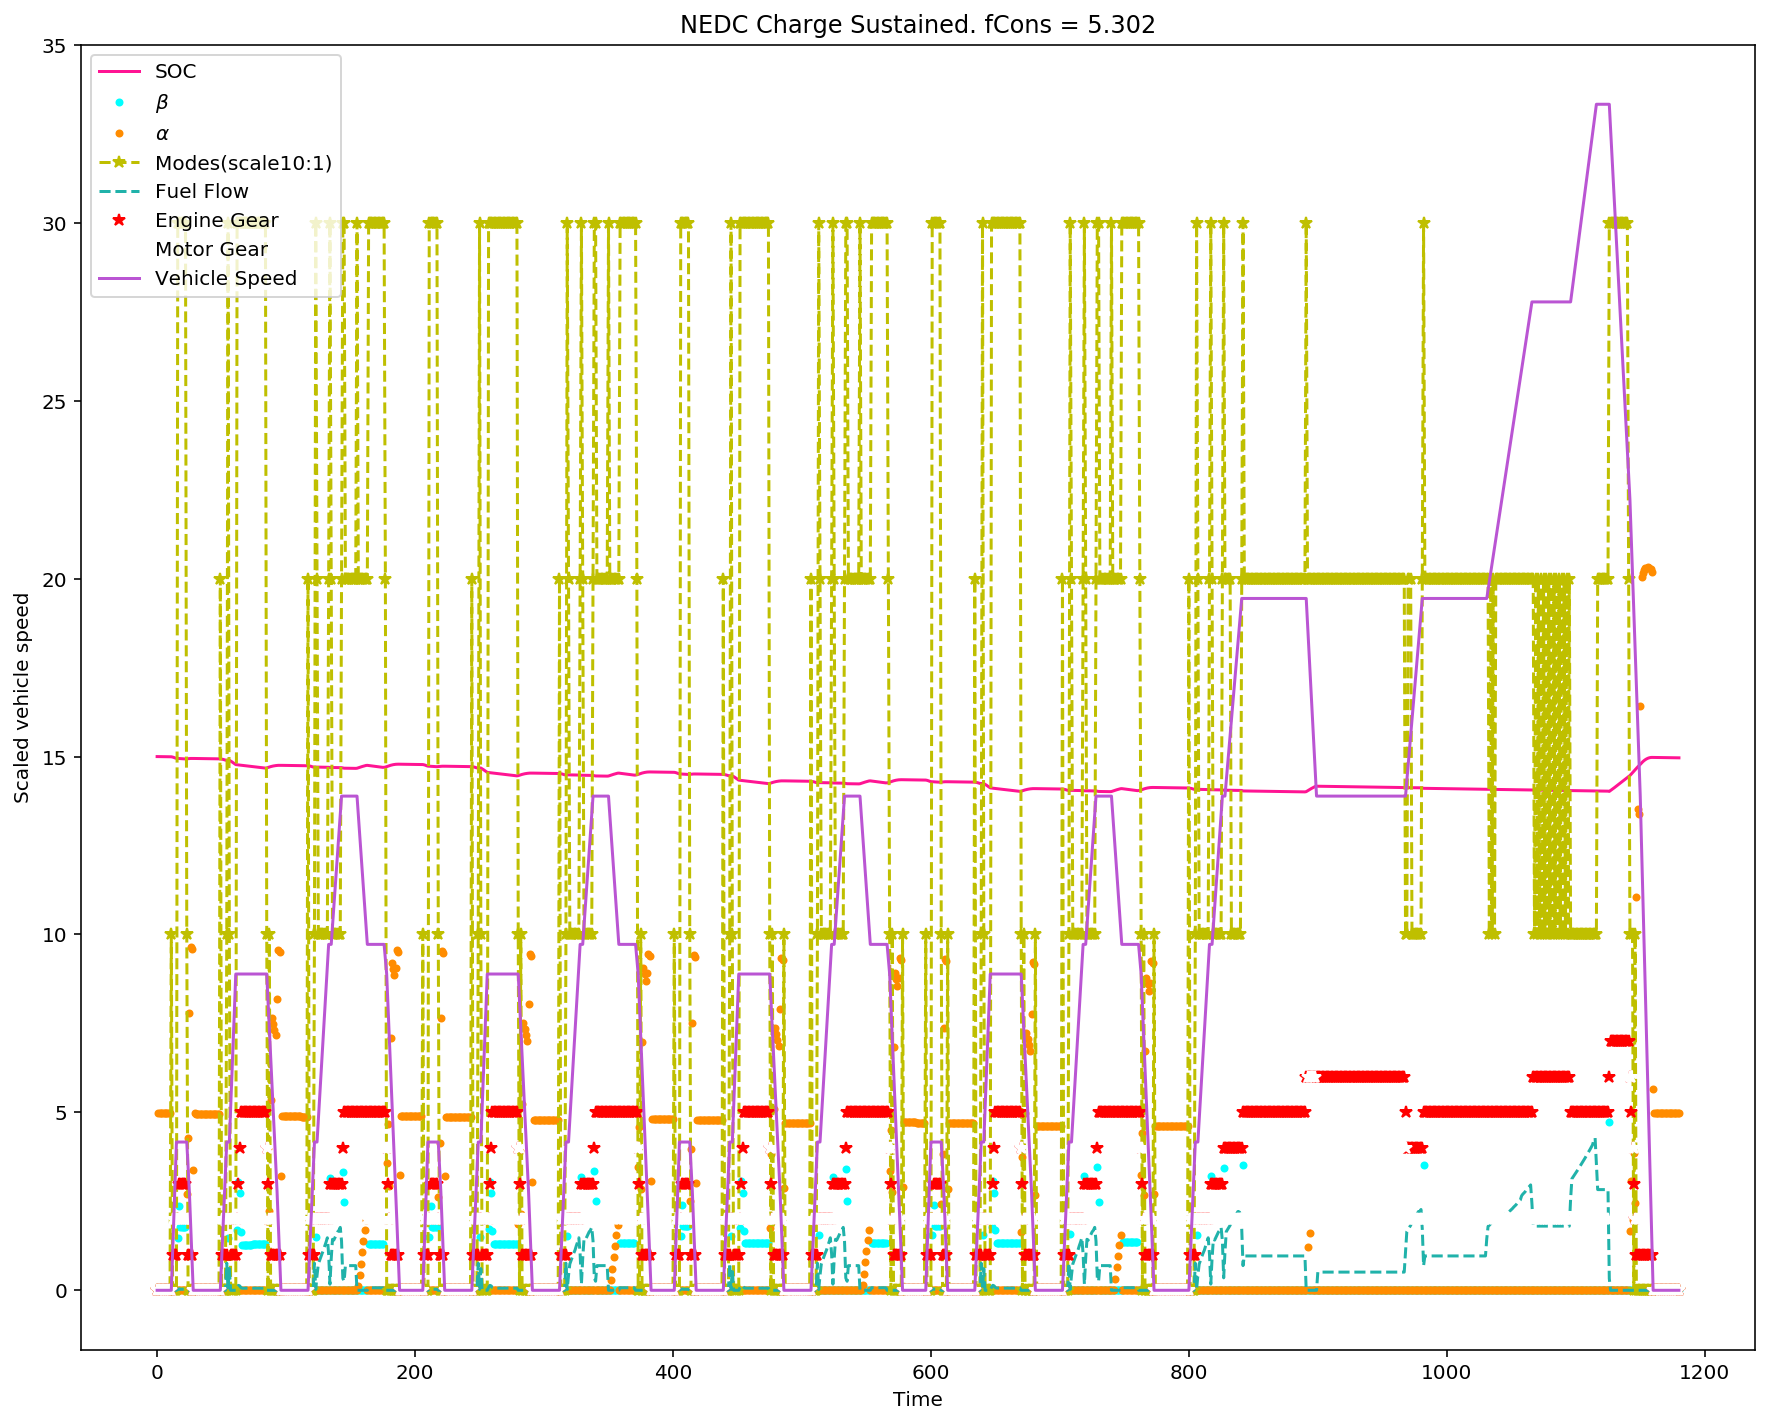

In [6]:
# Charge charge sustain test
if not(NNO): 
    print('inside')
NNO =load_model('201906231338_Model_optimised_mid_summer3.hd5')

vehicleForGAOptmized = PHEV(velFile,NNO,{'mass':1930,'SOC_init':15,'SOC_target':15,'SOC_min':12}) #{'SOC_init':15,'SOC_target':15,'SOC_min':10})
print(vehicleForGAOptmized.SOC_target)
vehicleForGAOptmized.RunSimulation()
plt.figure(figsize=(15,12))
plt.plot(vehicleForGAOptmized.soc,label = 'SOC',color='deeppink')
plt.plot(vehicleForGAOptmized.beta*30,'c.',label=r'$\beta$',color='cyan')
plt.plot(vehicleForGAOptmized.alpha*10,'.',label=r'$\alpha$',color='darkorange')
plt.plot(vehicleForGAOptmized.mode*10,'y--*', label = 'Modes(scale10:1)')
plt.plot(vehicleForGAOptmized.fuelFlow*1000,'--', label = 'Fuel Flow', color='lightseagreen')
plt.plot(vehicleForGAOptmized.engGear,'*', label = 'Engine Gear',color='red')
plt.plot(vehicleForGAOptmized.emGear,'*',color='white',label='Motor Gear')
plt.plot(vehicleForGAOptmized.vehSpeed,'b-',label='Vehicle Speed',color='mediumorchid')
plt.xlabel('Time')
plt.ylabel('Scaled vehicle speed')
plt.legend(loc='best')


plt.title('NEDC Charge Sustained. fCons = %.3f' % (vehicleForGAOptmized.fuelFlow.sum()*1000*100/vehicleForGAOptmized.x[-1]))
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\summary',dpi=300)

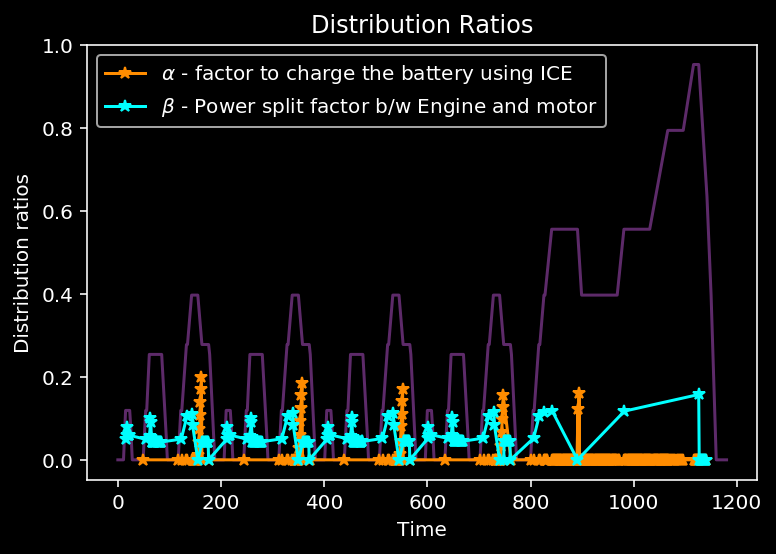

In [29]:
iAlpha = vehicleForGAOptmized.mode==2
iBeta = vehicleForGAOptmized.mode==3
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 10})
plt.plot(vehicleForGAOptmized.vehSpeed/35,alpha=0.5,color='mediumorchid')
plt.plot(vehicleForGAOptmized.time[iAlpha],vehicleForGAOptmized.alpha[iAlpha],'*-',color='darkorange',label=r'$\alpha$ - factor to charge the battery using ICE ')# *100
plt.plot(vehicleForGAOptmized.time[iBeta],vehicleForGAOptmized.beta[iBeta],'-*',label=r'$\beta$ - Power split factor b/w Engine and motor',color='cyan') # *100
# plt.plot(vehicleForGAOptmized.mode*10)
plt.xlabel('Time')
plt.ylabel('Distribution ratios')
plt.legend(loc='best')
plt.title('Distribution Ratios')
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\Power Distribution Ratios.svg',dpi=300,format="svg")

In [ ]:
vehicleForGAOptmized.RunSimulation()

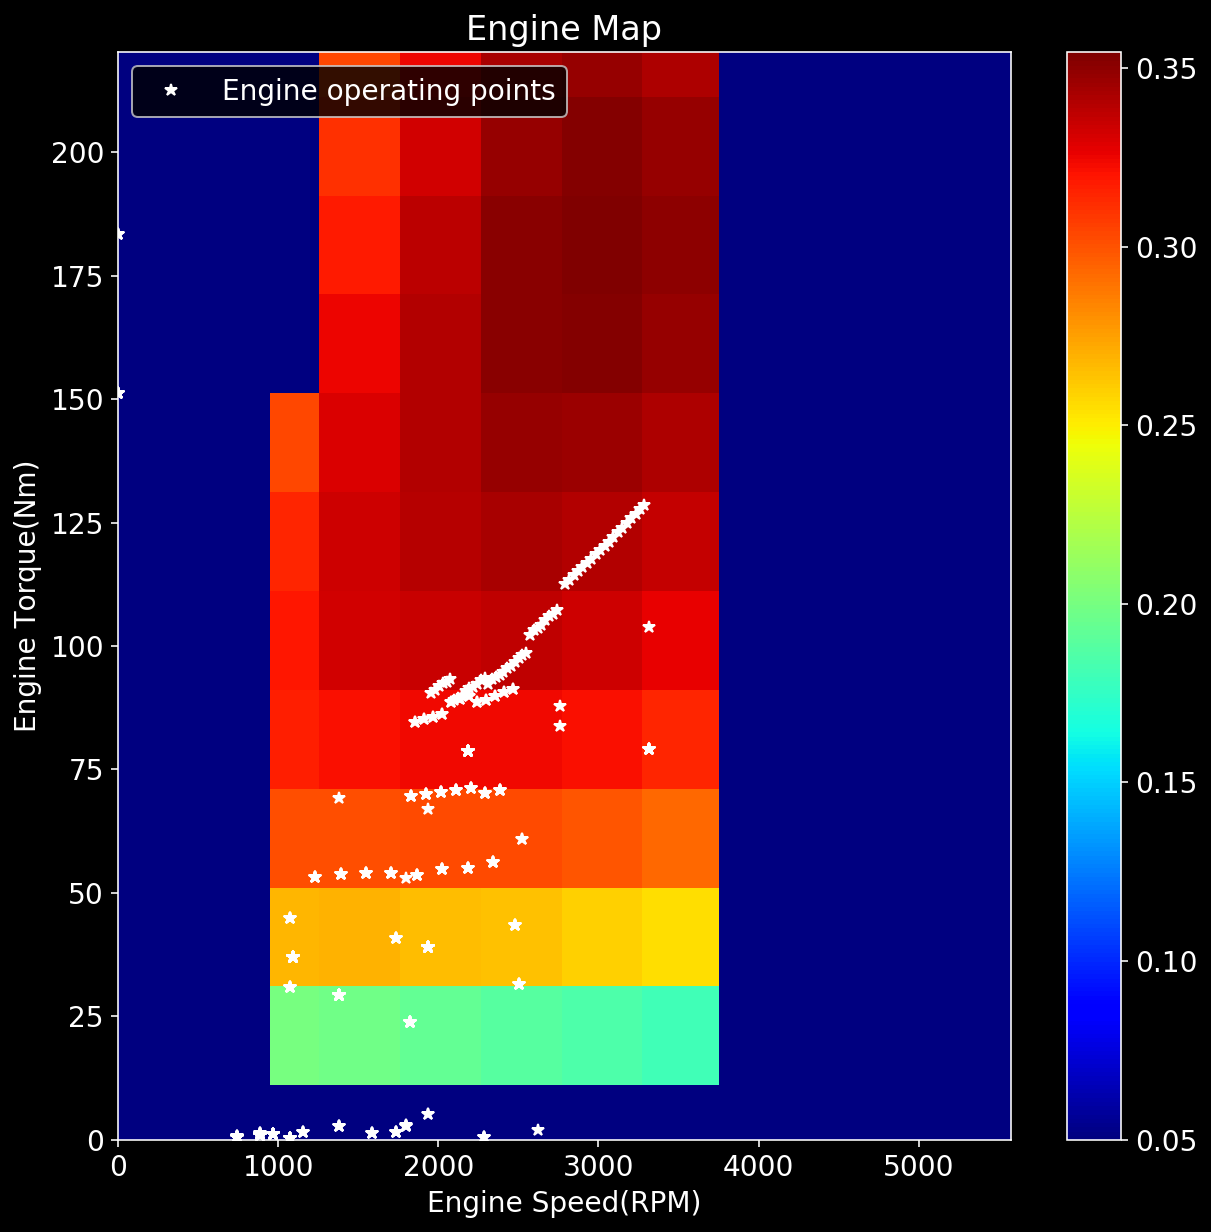

In [139]:
iPos = vehicleForGAOptmized.engTorque>0
xx,yy = np.meshgrid(np.linspace(0,vehicleForGAOptmized.engRPM.max()*1.2,200),np.linspace(0,vehicleForGAOptmized.engTorque.max()*1.2,100))
plt.figure(figsize=(10,10))
#plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14})
plt.pcolor(xx,yy,vehicleForGAOptmized.EngineMap(xx.ravel(),yy.ravel()).reshape(xx.shape),cmap='jet')
plt.colorbar()
plt.plot(vehicleForGAOptmized.engRPM[iPos],vehicleForGAOptmized.engTorque[iPos],'*w',label='Engine operating points')
plt.xlabel('Engine Speed(RPM)')
plt.ylabel('Engine Torque(Nm)')
plt.legend(loc='upper left')
plt.title('Engine Map')
# plt.plot(vehicleForGAOptmized.engRPM/100,label='rpm')
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\engPoints.svg',dpi=500,format="svg")
#plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\engPoints.svg',dpi=300,format='svg')

Text(0.5, 1.0, '$\\alpha$ mode=3')

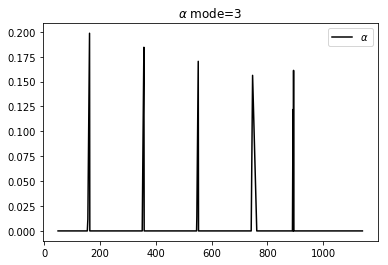

In [13]:
#iAlpha = vehicleForGAOptmized.mode==2
iAlpha = vehicleForGAOptmized.mode==2
plt.plot(vehicleForGAOptmized.time[iAlpha],vehicleForGAOptmized.alpha[iAlpha],'k-',label=r'$\alpha$')
#plt.plot(vehicleForGAOptmized.time[iAlpha],vehicleForGAOptmized.alpha[iAlpha],'r--')
plt.legend(loc='upper right')
plt.title(r'$\alpha$ mode=3')

Text(0.5, 1.0, '$\\beta$ mode=3')

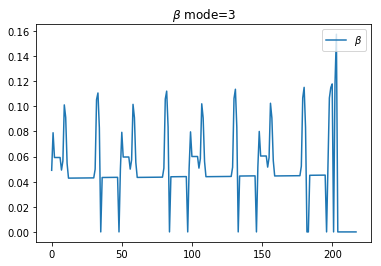

In [14]:
iBeta = vehicleForGAOptmized.mode==3
plt.plot(vehicleForGAOptmized.beta[iBeta],label=r'$\beta$')
plt.legend(loc='upper right')
plt.title(r'$\beta$ mode=3')

"plt.figure(5)\nplt.plot(vehicleForGAOptmized.time[jPos],vehicleForGAOptmized.powerMech[jPos]-vehicleForGAOptmized.powerEm[jPos],'*-',label='rpm')\nprint( (vehicleForGAOptmized.emRPM>12000).sum() )"

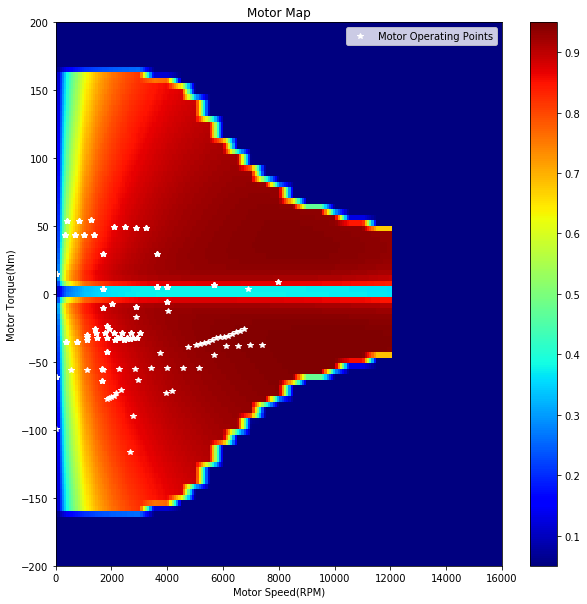

In [15]:
xx,yy = np.meshgrid(np.linspace(0,16e3,200),np.linspace(-200,200,100))
jPos = vehicleForGAOptmized.emTorque!=0 #np.logical_or(vehicleForGAOptmized.mode==0,vehicleForGAOptmized.demTrq<0)
plt.figure(figsize=(10,10))
plt.pcolor(xx,yy,(vehicleForGAOptmized.MotorMap((xx.ravel(),yy.ravel())).reshape(xx.shape)),cmap='jet')
plt.colorbar()
plt.plot(vehicleForGAOptmized.emRPM[jPos],vehicleForGAOptmized.emTorque[jPos],'*w',label='Motor Operating Points')
plt.xlabel('Motor Speed(RPM)')
plt.ylabel('Motor Torque(Nm)')
plt.legend(loc='upper right')
plt.title('Motor Map')
# plt.plot(vehicleForGAOptmized.engRPM/100,label='rpm')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\motor points',dpi=300)
'''plt.figure(5)
plt.plot(vehicleForGAOptmized.time[jPos],vehicleForGAOptmized.powerMech[jPos]-vehicleForGAOptmized.powerEm[jPos],'*-',label='rpm')
print( (vehicleForGAOptmized.emRPM>12000).sum() )'''

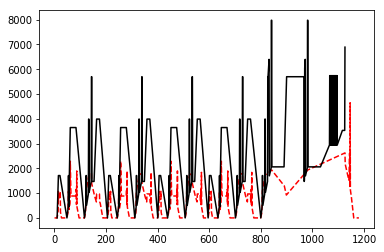

In [16]:
plt.plot(vehicleForGAOptmized.time[jPos],vehicleForGAOptmized.engRPM[jPos],'r--')
plt.plot(vehicleForGAOptmized.time[iPos],vehicleForGAOptmized.emRPM[iPos],'k-')

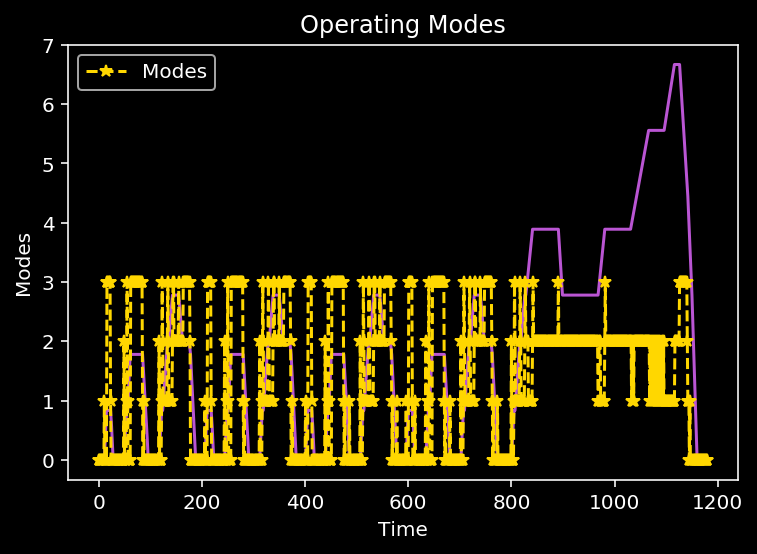

In [60]:
plt.style.use('dark_background')
plt.plot(vehicleForGAOptmized.vehSpeed/5,alpha=1,color='mediumorchid')
plt.plot(vehicleForGAOptmized.mode,'--*',color='gold',label='Modes')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Modes')
plt.title('Operating Modes')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\modes',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

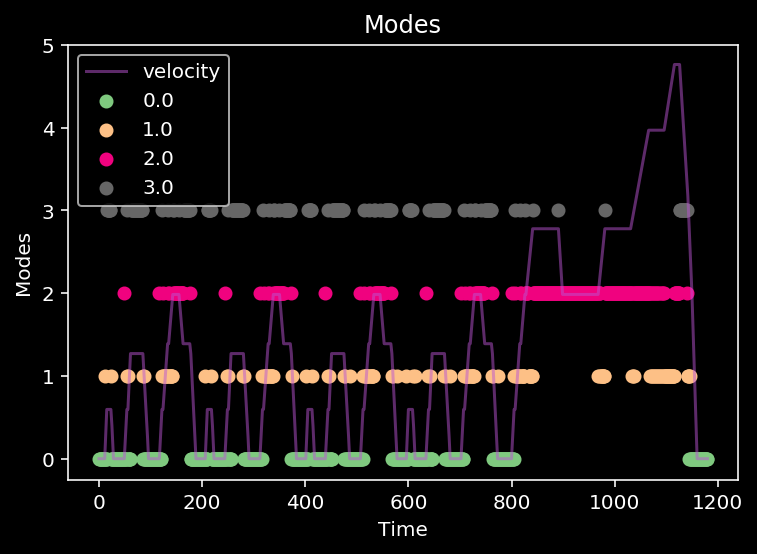

In [138]:
x=vehicleForGAOptmized.time
y=vehicleForGAOptmized.mode
classes = vehicleForGAOptmized.mode
unique = np.unique(classes)

colors = [plt.cm.Accent(i/float(len(unique)-1)) for i in range(len(unique))]
for i, u in enumerate(unique):
    xi = [x[j] for j  in range(len(x)) if classes[j] == u]
    yi = [y[j] for j  in range(len(x)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u),marker='o')
plt.plot(vehicleForGAOptmized.vehSpeed/7,alpha=0.5,color='mediumorchid',label='velocity')
plt.xlabel('Time')
plt.ylabel('Modes')
plt.title(r'Modes')
plt.legend(loc='best')
#plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\modes.svg',dpi=500,format="svg")

0 Electric mode |
1 ICE mode |
2 Hybrid mode |
3 Power mode

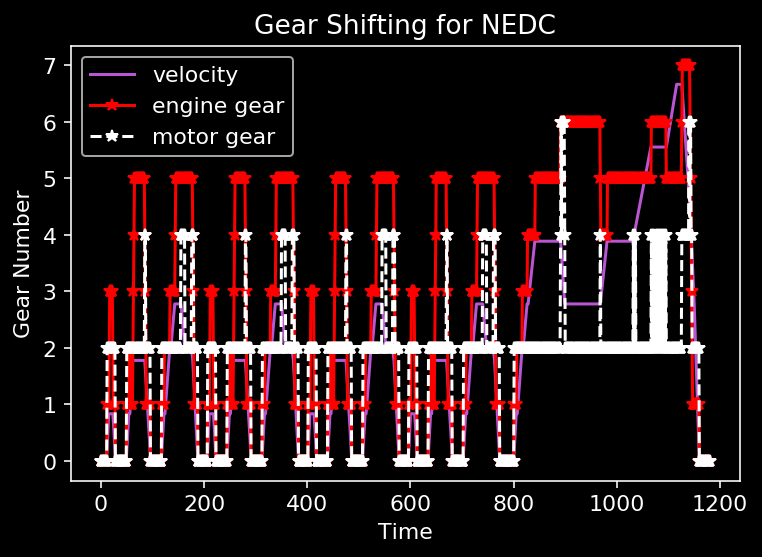

In [148]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 11})
plt.plot(vehicleForGAOptmized.vehSpeed/5,alpha=1,color='mediumorchid',label='velocity')
plt.plot(vehicleForGAOptmized.engGear,'r-*',label='engine gear')
plt.plot(vehicleForGAOptmized.emGear,'w--*',label='motor gear')
plt.legend(loc='best',)
plt.xlabel('Time')
plt.ylabel('Gear Number')
plt.title('Gear Shifting for NEDC')
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\Gears.svg',dpi=500,format="svg")

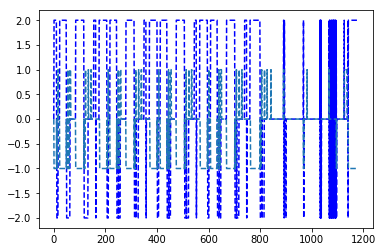

In [19]:
plt.plot(vehicleForGAOptmized.emShiftGear,'b--')
plt.plot(vehicleForGAOptmized.engShiftGear,'--')
#plt.legend(('motor gear_shift signal','engine gear_shift signal'),loc='upper right')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\gears_shift',dpi=300)

vehicleForGAOptmized = PHEV(velFile,NNO,{'SOC_init':15,'SOC_target':15,'SOC_min':10})
vehicleForGAOptmized.RunSimulation()

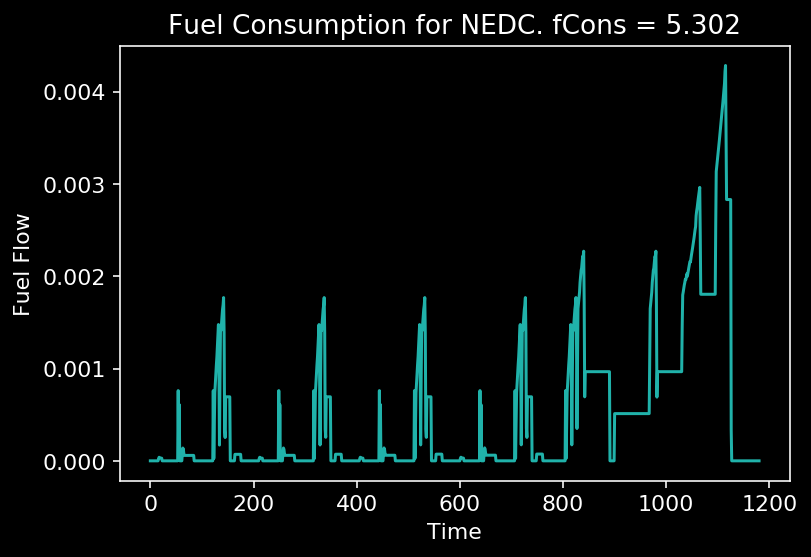

In [147]:
plt.plot(vehicleForGAOptmized.fuelFlow, color='lightseagreen')
plt.xlabel('Time')
plt.ylabel('Fuel Flow')
plt.title('Fuel Consumption for NEDC. fCons = %.3f' % (vehicleForGAOptmized.fuelFlow.sum()*1000*100/vehicleForGAOptmized.x[-1]))
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\FuelFlow.svg',dpi=500,format="svg")

In [ ]:
plt.hist(ga.varOptimal)
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\weights_hist',dpi=300)

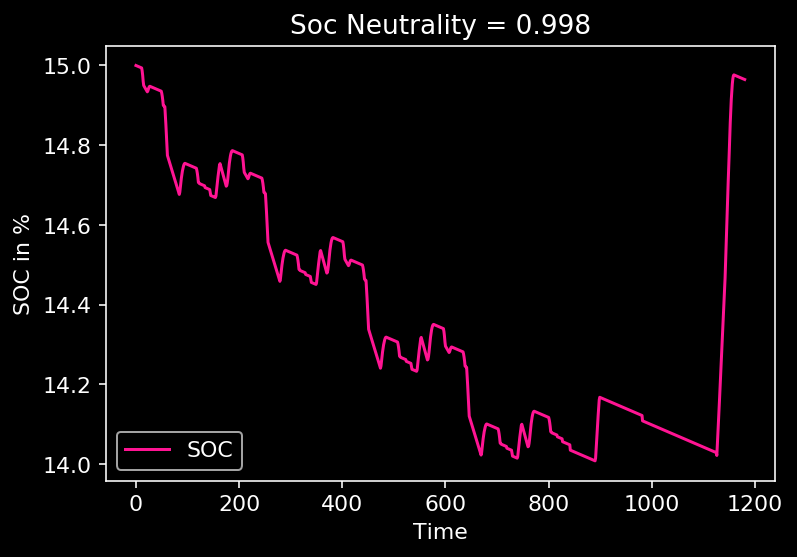

In [145]:
plt.rcParams.update({'font.size': 11})
plt.plot(vehicleForGAOptmized.soc,color='deeppink',label='SOC')
plt.xlabel('Time')
plt.ylabel('SOC in %')
plt.legend(loc='lower left')
plt.title('Soc Neutrality = %.3f' % ((vehicleForGAOptmized.soc[-1]/vehicleForGAOptmized.SOC_init)))
plt.savefig(r'D:\Master Thesis\project tech files\07August1_final_code\PlotsVectorised\SOC.svg',dpi=500,format='svg')

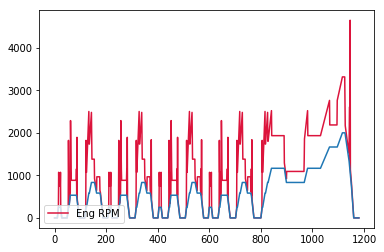

In [79]:
plt.plot(vehicleForGAOptmized.engRPM,color='crimson',label='Eng RPM')
plt.plot(vehicleForGAOptmized.vehSpeed*60)
plt.legend(loc='lower left')

In [2]:
from ann_visualizer.visualize import ann_viz

In [3]:
NNO =load_model('201906231338_Model_optimised_mid_summer3.hd5')

In [12]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\anup.padaki\AppData\Local\Continuum\anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'

In [13]:
ann_viz(NNO, title="My first neural network")